In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.engine import input_layer
from keras import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from google.colab import drive
from keras.utils import to_categorical
import keras

<ipython-input-7-191d89b3bb13>:55: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp.corr()
<ipython-input-7-191d89b3bb13>:56: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True), square=True, ax=ax)


<Axes: >

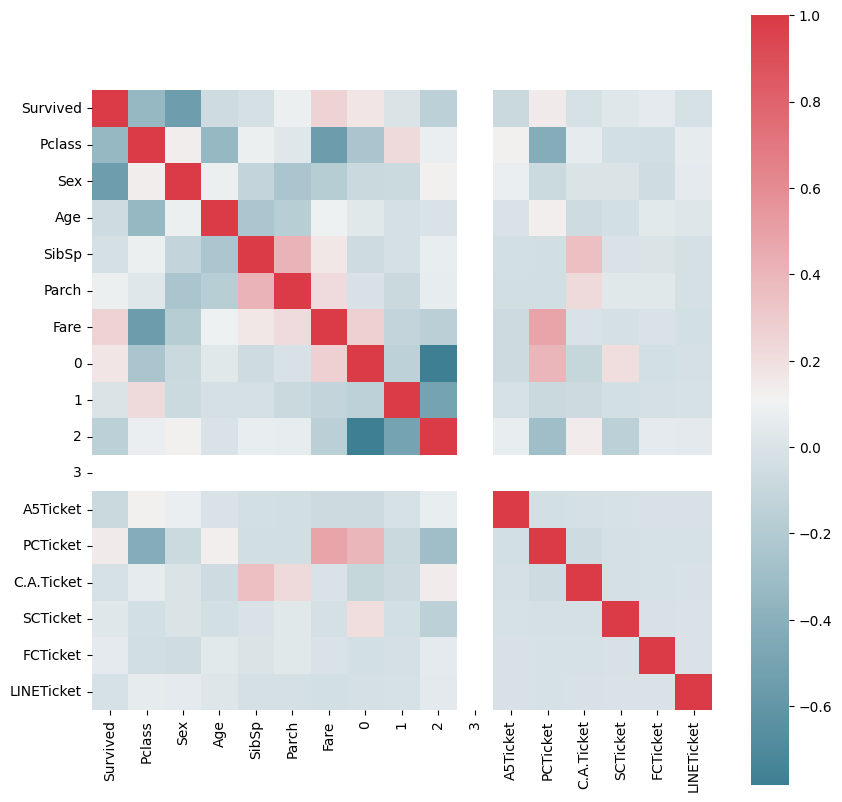

In [ ]:
train = pd.read_csv("/content/train.csv")
#-------------------------------------------------------------------------------

train.Embarked = train.Embarked.replace(np.NaN, 'S')

le = preprocessing.LabelEncoder()

for col in ['Embarked','Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

temp1 = pd.DataFrame(to_categorical(train['Embarked'], num_classes=4))

temp1.reset_index(drop=True, inplace=True)

train.reset_index(drop=True, inplace=True)

train = pd.concat([train, temp1],axis=1)

#Replace NaN values with median values
for word in ['Pclass','Age','SibSp','Parch','Fare']:
  med = train[word].median()
  train[word] = train[word].replace(np.NaN, med)

#Replace missing cabin values with 0 and present cabin values with 1
train.Cabin = train.Cabin.replace(np.NaN, 0)
train.Cabin = train.Cabin.where(train.Cabin == 0, 1)

#Codify names by presece of parenthesis
train.Name = train.Name.apply(lambda x: 1 if '(' in x else x)
train.Name = train.Name.where(train.Name==1, 0)

temp = train.Ticket.apply(lambda x: 1 if 'A/5' in x or 'A./5' in x else 0)
train['A5Ticket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'PC' in x else 0)
train['PCTicket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'C.A.' in x or 'CA' in x else 0)
train['C.A.Ticket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'SC' in x or 'S.C' in x else 0)
train['SCTicket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'F.C' in x or 'FC' in x else 0)
train['FCTicket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'LINE' in x else 0)
train['LINETicket'] = temp
#-------------------------------------------------------------------------------

train = train.drop(['PassengerId','Ticket','Embarked'],axis=1)

temp = train
f,ax=plt.subplots(figsize=(10,10))
corr = temp.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True), square=True, ax=ax)

<ipython-input-3-5ecc0ff9f1d6>:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp.corr()
<ipython-input-3-5ecc0ff9f1d6>:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True), square=True, ax=ax)


<Axes: >

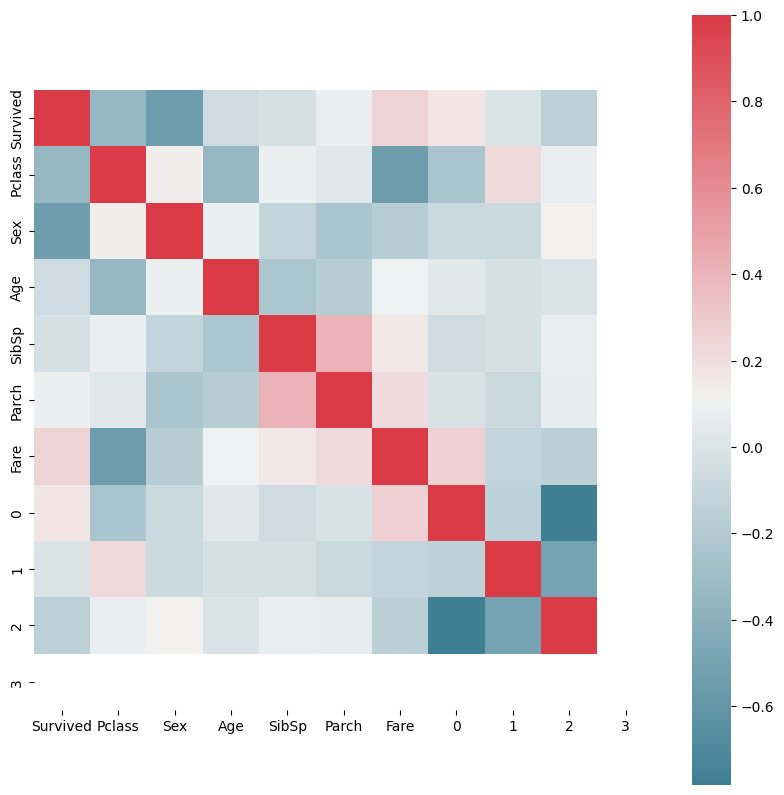

In [ ]:
train = pd.read_csv("/content/train.csv")
#-------------------------------------------------------------------------------

train.Embarked = train.Embarked.replace(np.NaN, 'S')

le = preprocessing.LabelEncoder()

for col in ['Embarked','Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

temp1 = pd.DataFrame(to_categorical(train['Embarked'], num_classes=4))

temp1.reset_index(drop=True, inplace=True)

train.reset_index(drop=True, inplace=True)

train = pd.concat([train, temp1],axis=1)

#Replace NaN values with median values
for word in ['Pclass','Age','SibSp','Parch','Fare']:
  med = train[word].median()
  train[word] = train[word].replace(np.NaN, med)

#Replace missing cabin values with 0 and present cabin values with 1
train.Cabin = train.Cabin.replace(np.NaN, 0)
train.Cabin = train.Cabin.where(train.Cabin == 0, 1)

#Codify names by presece of parenthesis
train.Name = train.Name.apply(lambda x: 1 if '(' in x else x)
train.Name = train.Name.where(train.Name==1, 0)

#-------------------------------------------------------------------------------

train = train.drop(['PassengerId','Ticket','Embarked'],axis=1)

temp = train
f,ax=plt.subplots(figsize=(10,10))
corr = temp.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True), square=True, ax=ax)

Train Accuracy 0.850
Test Accuracy 0.799


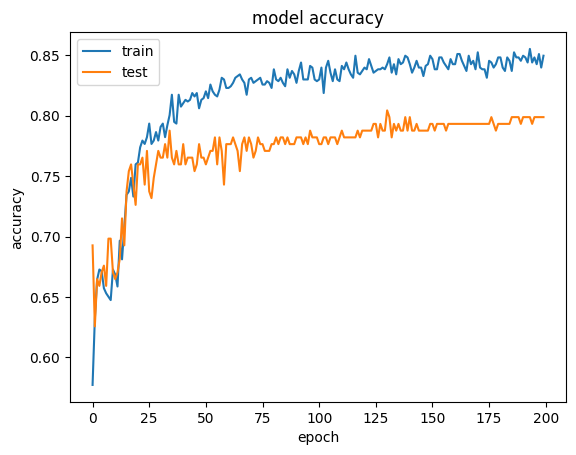

14/14 [==============================] - 0s 5ms/step


In [ ]:
#Taking only simple data. Result: 0.75

train = pd.read_csv("/content/train.csv")
#-------------------------------------------------------------------------------

train.Embarked = train.Embarked.replace(np.NaN, 'S')

le = preprocessing.LabelEncoder()

for col in ['Embarked','Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

temp1 = pd.DataFrame(to_categorical(train['Embarked'], num_classes=4))

temp1.reset_index(drop=True, inplace=True)

train.reset_index(drop=True, inplace=True)

train = pd.concat([train, temp1],axis=1)

#Replace NaN values with median values
for word in ['Pclass','Age','SibSp','Parch','Fare']:
  med = train[word].median()
  train[word] = train[word].replace(np.NaN, med)

#-------------------------------------------------------------------------------

train = train.drop(['PassengerId','Ticket','Embarked','Name','Cabin'],axis=1)

x_train,x_test,y_train,y_test=train_test_split( train.drop(['Survived'],axis = 1), train['Survived'],test_size=0.2)

x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')

mm=MinMaxScaler()
fit=mm.fit(x_train)
X_train=fit.transform(x_train)
X_test=fit.transform(x_test)

def lr_scheduler(epoch, lr):
    decay_rate = 0.8
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=0)
]

#Create Model
model = Sequential()
model.add(Dense(640,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(320, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=200,batch_size=16,verbose=0,validation_data=(x_test,y_test),callbacks=callbacks )

loss, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy %.3f' %acc)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy %.3f' %acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#-------------------------------------------------------------------------------
train = pd.read_csv("/content/test.csv")

train.Embarked = train.Embarked.replace(np.NaN, 'S')

le = preprocessing.LabelEncoder()

for col in ['Embarked','Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

temp1 = pd.DataFrame(to_categorical(train['Embarked'], num_classes=4))

temp1.reset_index(drop=True, inplace=True)

train.reset_index(drop=True, inplace=True)

train = pd.concat([train, temp1],axis=1)

#Replace NaN values with median values
for word in ['Pclass','Age','SibSp','Parch','Fare']:
  med = train[word].median()
  train[word] = train[word].replace(np.NaN, med)

#-------------------------------------------------------------------------------

#Predict and create submission
test = train.drop(['PassengerId','Ticket','Embarked','Name','Cabin'],axis=1)
test = np.asarray(test).astype('float32')
predicted = model.predict(test)
predicted = predicted.round(0).astype('int32')
submission = pd.read_csv('/content/gender_submission.csv',index_col=0)
submission.Survived=predicted
submission.to_csv('SimpleV1.0.csv')

Train Accuracy 0.890
Test Accuracy 0.754


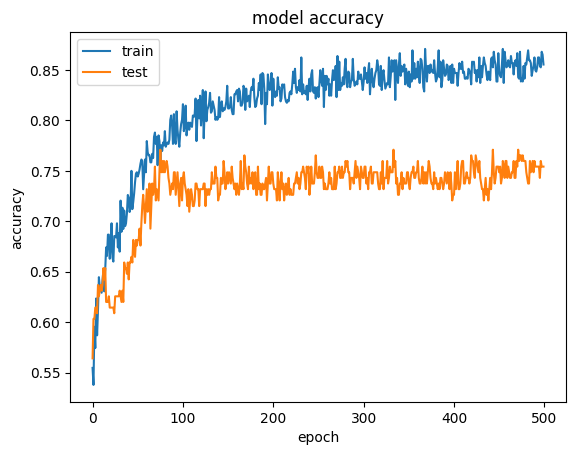

14/14 [==============================] - 0s 2ms/step


In [ ]:
#Model meant to codify everything possible. Result:

train = pd.read_csv("/content/train.csv")
#-------------------------------------------------------------------------------

train.Embarked = train.Embarked.replace(np.NaN, 'S')

le = preprocessing.LabelEncoder()

for col in ['Embarked','Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

temp1 = pd.DataFrame(to_categorical(train['Embarked'], num_classes=4))

temp1.reset_index(drop=True, inplace=True)

train.reset_index(drop=True, inplace=True)

train = pd.concat([train, temp1],axis=1)

#Replace NaN values with median values
for word in ['Pclass','Age','SibSp','Parch','Fare']:
  med = train[word].median()
  train[word] = train[word].replace(np.NaN, med)

#Replace missing cabin values with 0 and present cabin values with 1
train.Cabin = train.Cabin.replace(np.NaN, 0)
train.Cabin = train.Cabin.where(train.Cabin == 0, 1)

#Codify names by presece of parenthesis
train.Name = train.Name.apply(lambda x: 1 if '(' in x else x)
train.Name = train.Name.where(train.Name==1, 0)

temp = train.Ticket.apply(lambda x: 1 if 'A/5' in x or 'A./5' in x else 0)
train['A5Ticket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'PC' in x else 0)
train['PCTicket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'C.A.' in x or 'CA' in x else 0)
train['C.A.Ticket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'SC' in x or 'S.C' in x else 0)
train['SCTicket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'F.C' in x or 'FC' in x else 0)
train['FCTicket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'LINE' in x else 0)
train['LINETicket'] = temp
#-------------------------------------------------------------------------------

train = train.drop(['PassengerId','Ticket','Embarked'],axis=1)

x_train,x_test,y_train,y_test=train_test_split( train.drop(['Survived'],axis = 1), train['Survived'],test_size=0.2)

x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')

mm=MinMaxScaler()
fit=mm.fit(x_train)
X_train=fit.transform(x_train)
X_test=fit.transform(x_test)

def lr_scheduler(epoch, lr):
    decay_rate = 0.96
    decay_step =20
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=0)
]

#Create Model
model = Sequential()
model.add(Dense(640,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(320, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(1, activation = 'sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=500,batch_size=16,verbose=0,validation_data=(x_test,y_test),callbacks=callbacks )

loss, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy %.3f' %acc)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy %.3f' %acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#-------------------------------------------------------------------------------
train = pd.read_csv("/content/test.csv")

train.Embarked = train.Embarked.replace(np.NaN, 'S')

le = preprocessing.LabelEncoder()

for col in ['Embarked','Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

temp1 = pd.DataFrame(to_categorical(train['Embarked'], num_classes=4))

temp1.reset_index(drop=True, inplace=True)

train.reset_index(drop=True, inplace=True)

train = pd.concat([train, temp1],axis=1)

#Replace NaN values with median values
for word in ['Pclass','Age','SibSp','Parch','Fare']:
  med = train[word].median()
  train[word] = train[word].replace(np.NaN, med)

#Replace noncabin values with 0 and cabin with 1
train.Cabin = train.Cabin.replace(np.NaN, 0)
train.Cabin = train.Cabin.where(train.Cabin == 0, 1)

#Codify names by presece of parenthesis
train.Name = train.Name.apply(lambda x: 1 if '(' in x else x)
train.Name = train.Name.where(train.Name==1, 0)

temp = train.Ticket.apply(lambda x: 1 if 'A/5' in x or 'A./5' in x else 0)
train['A5Ticket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'PC' in x else 0)
train['PCTicket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'C.A.' in x or 'CA' in x else 0)
train['C.A.Ticket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'SC' in x or 'S.C' in x else 0)
train['SCTicket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'F.C' in x or 'FC' in x else 0)
train['FCTicket'] = temp

temp = train.Ticket.apply(lambda x: 1 if 'LINE' in x else 0)
train['LINETicket'] = temp

#-------------------------------------------------------------------------------

#Predict and create submission
test = train.drop(['PassengerId','Ticket','Embarked'],axis=1)
test = np.asarray(test).astype('float32')
predicted = model.predict(test)
predicted = predicted.round(0).astype('int32')
submission = pd.read_csv('/content/gender_submission.csv',index_col=0)
submission.Survived=predicted
submission.to_csv('CodifyAll3.csv')

In [ ]:
#Only use gender and class age. Result: 
train = pd.read_csv("/content/train.csv")
le = preprocessing.LabelEncoder()

for col in ['Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

med = train.Age.median()
train['Age'] = train['Age'].replace(np.NaN, med)

X = train.drop(['Survived','Name','PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis = 1)
Y = train['Survived']
x_train,x_test,y_train,y_test=train_test_split( X , Y,test_size=0.2)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(1, activation = 'sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=0,validation_data=(x_test,y_test) )

loss, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy %.3f' %acc)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Train Accuracy %.3f' %acc)


train = pd.read_csv("/content/test.csv")
le = preprocessing.LabelEncoder()

for col in ['Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

med = train.Age.median()
train['Age'] = train['Age'].replace(np.NaN, med)

test = train.drop(['Name','PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis = 1)
test.columns = test.columns.astype(str)
test = np.asarray(test).astype('float32')
predicted = model.predict(test)
predicted = predicted.round(0).astype('int32')
submission = pd.read_csv('/content/gender_submission.csv',index_col=0)
submission.Survived=predicted
submission.to_csv('GenderClassAge.csv')

Train Accuracy 0.805
Train Accuracy 0.799
14/14 [==============================] - 0s 2ms/step


Train Accuracy 0.789
Train Accuracy 0.777


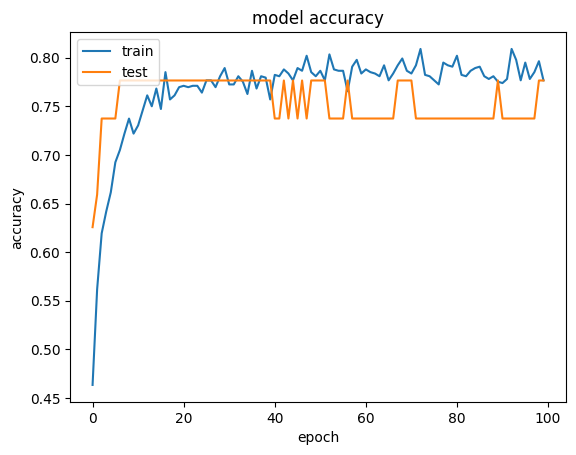

14/14 [==============================] - 0s 2ms/step


In [ ]:
#Only use gender and class. Small Model Result:0.787 
train = pd.read_csv("/content/train.csv")
le = preprocessing.LabelEncoder()

for col in ['Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

X = train.drop(['Survived','Name','PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age'],axis = 1)
Y = train['Survived']
x_train,x_test,y_train,y_test=train_test_split( X , Y,test_size=0.2)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(1, activation = 'sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=0,validation_data=(x_test,y_test) )

loss, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy %.3f' %acc)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Train Accuracy %.3f' %acc)


train = pd.read_csv("/content/test.csv")
le = preprocessing.LabelEncoder()

for col in ['Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

test = train.drop(['Name','PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age'],axis = 1)
test.columns = test.columns.astype(str)
test = np.asarray(test).astype('float32')
predicted = model.predict(test)
predicted = predicted.round(0).astype('int32')
submission = pd.read_csv('/content/gender_submission.csv',index_col=0)
submission.Survived=predicted
submission.to_csv('GenderClass.csv')

In [ ]:
#Only use gender and class. Bigger model. Result: 0.76555
train = pd.read_csv("/content/train.csv")
le = preprocessing.LabelEncoder()

for col in ['Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

X = train.drop(['Survived','Name','PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age'],axis = 1)
Y = train['Survived']
x_train,x_test,y_train,y_test=train_test_split( X , Y,test_size=0.2)

model = Sequential()
model.add(Dense(640,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(320, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(Dense(1, activation = 'sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=500,batch_size=32,verbose=0,validation_data=(x_test,y_test) )

loss, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy %.3f' %acc)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Train Accuracy %.3f' %acc)


train = pd.read_csv("/content/test.csv")
le = preprocessing.LabelEncoder()

for col in ['Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

test = train.drop(['Name','PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age'],axis = 1)
test.columns = test.columns.astype(str)
test = np.asarray(test).astype('float32')
predicted = model.predict(test)
predicted = predicted.round(0).astype('int32')
submission = pd.read_csv('/content/gender_submission.csv',index_col=0)
submission.Survived=predicted
submission.to_csv('BigGenderClass.csv')

Train Accuracy 0.788
Train Accuracy 0.782
14/14 [==============================] - 0s 4ms/step


Train Accuracy 0.698
Test Accuracy 0.670


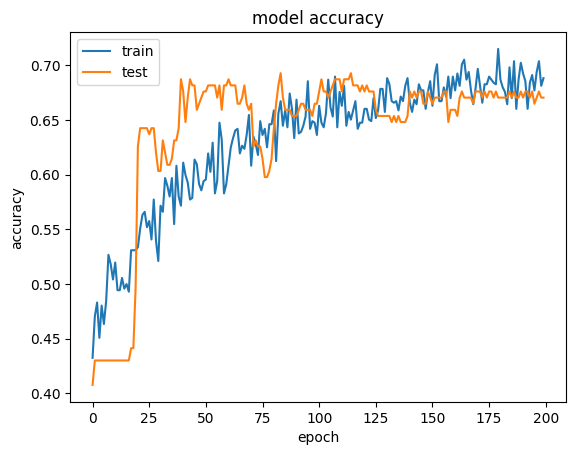

14/14 [==============================] - 0s 2ms/step


In [ ]:
#Only use gender and fare. Result: 0.7488
train = pd.read_csv("/content/train.csv")
le = preprocessing.LabelEncoder()

for col in ['Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

X = train.drop(['Survived','Name','PassengerId','SibSp','Parch','Ticket','Pclass','Cabin','Embarked','Age'],axis = 1)
Y = train['Survived']
x_train,x_test,y_train,y_test=train_test_split( X , Y,test_size=0.2)

mm=MinMaxScaler()
fit=mm.fit(X_train)
X_train=fit.transform(X_train)
X_test=fit.transform(X_test)

model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

def lr_scheduler(epoch, lr):
    decay_rate = 0.96
    decay_step = 40
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=0)
]

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=200,batch_size=64,verbose=0,validation_data=(x_test,y_test))

loss, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy %.3f' %acc)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy %.3f' %acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

train = pd.read_csv("/content/test.csv")
le = preprocessing.LabelEncoder()

for col in ['Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

test = train.drop(['Name','PassengerId','SibSp','Parch','Ticket','Pclass','Cabin','Embarked','Age'],axis = 1)
test.columns = test.columns.astype(str)
test = np.asarray(test).astype('float32')
predicted = model.predict(test)
predicted = predicted.round(0).astype('int32')
submission = pd.read_csv('/content/gender_submission.csv',index_col=0)
submission.Survived=predicted
submission.to_csv('GenderFare.csv')

Train Accuracy 0.794
Test Accuracy 0.715


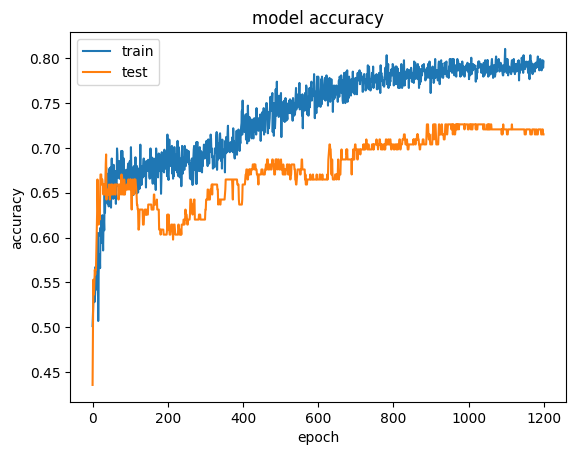

14/14 [==============================] - 0s 2ms/step


In [ ]:
#Only use gender and fare and embarked. Result: 0.
train = pd.read_csv("/content/train.csv")
le = preprocessing.LabelEncoder()

train.Embarked = train.Embarked.replace(np.NaN, 'S')

le = preprocessing.LabelEncoder()

for col in ['Embarked','Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

temp1 = pd.DataFrame(to_categorical(train['Embarked'], num_classes=4))

temp1.reset_index(drop=True, inplace=True)

train.reset_index(drop=True, inplace=True)

train = pd.concat([train, temp1],axis=1)


X = train.drop(['Survived','Name','PassengerId','SibSp','Parch','Ticket','Pclass','Embarked','Cabin','Age'],axis = 1)
Y = train['Survived']
x_train,x_test,y_train,y_test=train_test_split( X , Y,test_size=0.2)

model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=1200,batch_size=64,verbose=0,validation_data=(x_test,y_test) )

loss, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy %.3f' %acc)
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy %.3f' %acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

train = pd.read_csv("/content/test.csv")
le = preprocessing.LabelEncoder()

train.Embarked = train.Embarked.replace(np.NaN, 'S')

le = preprocessing.LabelEncoder()

for col in ['Embarked','Sex']:
  train[col] = le.fit_transform(train[col]).astype("uint8")

temp1 = pd.DataFrame(to_categorical(train['Embarked'], num_classes=4))

temp1.reset_index(drop=True, inplace=True)

train.reset_index(drop=True, inplace=True)

train = pd.concat([train, temp1],axis=1)

test = train.drop(['Name','PassengerId','SibSp','Parch','Ticket','Pclass','Cabin','Embarked','Age'],axis = 1)
test.columns = test.columns.astype(str)
test = np.asarray(test).astype('float32')
predicted = model.predict(test)
predicted = predicted.round(0).astype('int32')
submission = pd.read_csv('/content/gender_submission.csv',index_col=0)
submission.Survived=predicted
submission.to_csv('GenderFareEmbarked.csv')


Softmax got the same loss over and over
Tanh may owrk..
Had 4 layers with less nodes, switched to NN with 6 layers 640,320,160,80,40,1
Relu+Sigmoid+Binary_Crossentropy makes a really accurate model 80+ but the submission is bad so overfitting is occuring. 
Dropping everything besides Class and Sex results in a model with accuracy of 80ish, Submission of 76.55
Saying everyone dies gets a accuracy of 62.2%. This means 156 people in th submission lived

